In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
from datetime import timedelta
import re
from textblob import TextBlob 

In [30]:
def analisePolaridade(texto): 
    analysis = TextBlob(limparTexto(texto)) 
    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 0
    else: 
        return -1

def limparTexto(texto): 
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)", " ", texto).split()) 



url = 'https://min-api.cryptocompare.com/data/v2/news/?categories=dash&lTs=dataAlvo'
data = datetime.now()
dados = []

def search(lista, valor):
    if [(lista.index(x), x.index(valor)) for x in lista if valor in x] != []:
        return 1
    else:
        return 0

for i in range(1):
    url = url.replace('dataAlvo', str(data.strftime("%s")))
    j = requests.get(url).json()
    for resultado in j['Data']:
        #print(type(resultado['id']))
        #print(url)
        if (search(dados, resultado['id'])==0):
            dados.append([
                resultado['id'],
                resultado['published_on'],
                resultado['title'],
                resultado['source'],
                resultado['body'],
                analisePolaridade(str(resultado['title'])),
                resultado['categories'],
            ])
    url = url.replace(str(data.strftime("%s")), 'dataAlvo')
    #print(data)
    data = data - timedelta(days=1)
    
     
df = pd.DataFrame(dados, columns=['id', 'data','titulo','fonte', 'noticia', 'polaridade', 'categoria'])
print(df.shape)
print(df.head())

(50, 7)
       id        data                                             titulo  \
0  701398  1542236400  Rosetta Coffee Company Now Accepts Cryptocurre...   
1  700932  1542191453  PR: Bithumb Celebrates Its Fifth Anniversary w...   
2  700597  1542166574  Crypto Arbitrage Today: ADA, QTUM, BTG, XLM, U...   
3  698000  1542039281  Dash Outperforms Competitor Cryptocurrencies b...   
4  697812  1542031179  Evident Proof Blockchain Platform Accepts Dash...   

         fonte                                            noticia  polaridade  \
0  cryptoglobe  Rosetta Coffee, a Lynchburg, Virginia-based “s...           1   
1  bitcoin.com  The global cryptocurrency stock exchange Bithu...           0   
2    themerkle  Every day in the cryptocurrency world comes wi...           0   
3        blokt  The cryptocurrencies markets are mixed today w...           0   
4        blokt  Evident Proof; a decentralized, unhackable, an...          -1   

                            categoria  
0       

In [31]:
df['dataFormat'] = df['data'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d'))

df.head()
df.shape[0]

50

In [17]:
df.head()
print(df['titulo'][4])

Evident Proof Blockchain Platform Accepts Dash and Ripple’s XRP to Broaden its User Base


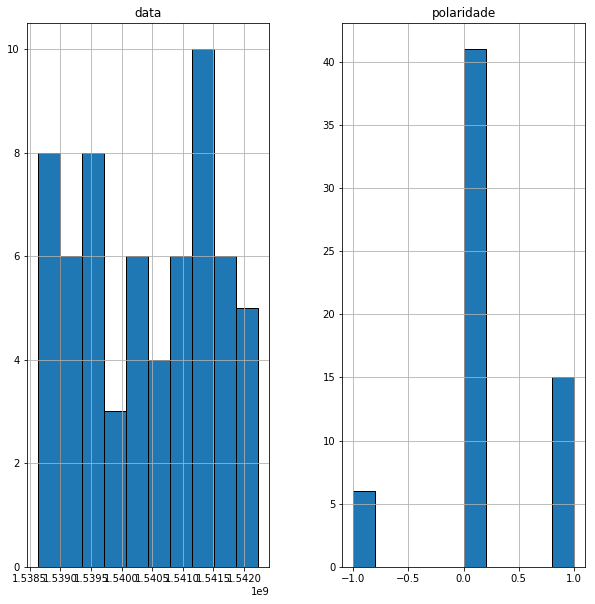

In [12]:
df.hist(edgecolor='black', figsize=(10, 10), grid=True);

In [32]:
print(pd.unique(df['dataFormat']))

['2018-11-14' '2018-11-12' '2018-11-08' '2018-11-07' '2018-11-06'
 '2018-11-05' '2018-11-04' '2018-11-02' '2018-10-31' '2018-10-30'
 '2018-10-29' '2018-10-28' '2018-10-26' '2018-10-25' '2018-10-24'
 '2018-10-23' '2018-10-22' '2018-10-21' '2018-10-20' '2018-10-17'
 '2018-10-16' '2018-10-15' '2018-10-14' '2018-10-13' '2018-10-12'
 '2018-10-11']


In [33]:
print(len(list(df[(df.polaridade == -1)].groupby('dataFormat').count()['polaridade'])))



df_novo = df.pivot_table(index='polaridade', 
                     columns='dataFormat', 
                     values='id',
                     fill_value=0, 
                     aggfunc='count').unstack()

df_novo.head()

listaNova = list(df_novo)
print(listaNova)
divisor = int(len(listaNova) / 3)

tes = np.array(listaNova).reshape(divisor,3)
polar = pd.DataFrame(tes, columns=['neg', 'pos','neutro'])
polar.head()

5
[1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 6, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1]


,neg,pos,neutro
0,1,1,0
1,0,0,2
2,0,1,0
3,0,0,1
4,1,1,0


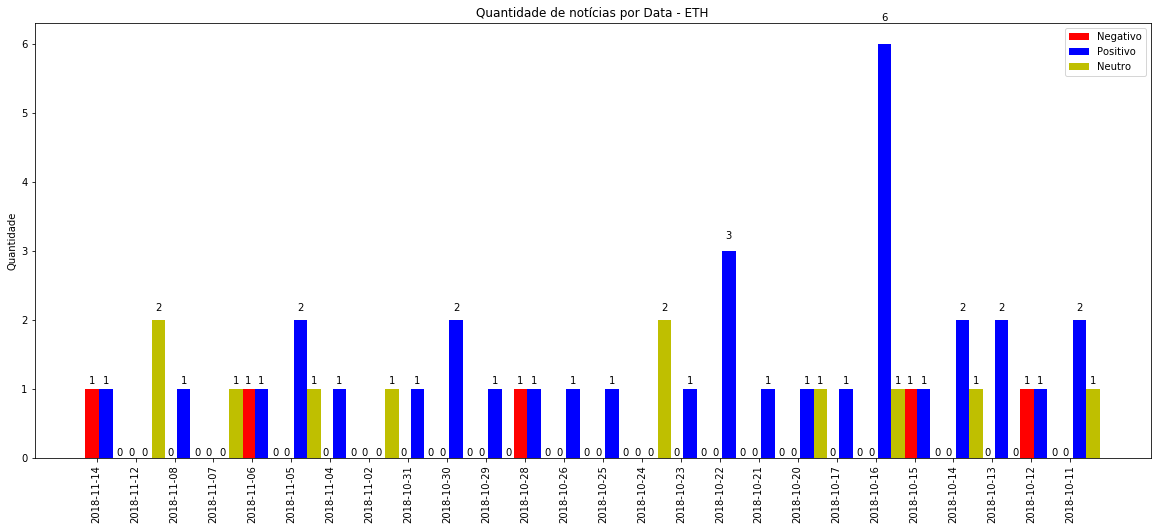

In [34]:
import numpy as np
import matplotlib.pyplot as plt

N = divisor
men_means = list(polar['neg'])


ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)

rects1 = ax.bar(ind, men_means, width, color='r')

women_means = list(polar['pos'])

rects2 = ax.bar(ind + width, women_means, width, color='b')

w_means = list(polar['neutro'])

rects3 = ax.bar(ind + width + width, w_means, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de notícias por Data - ETH')
ax.set_xticks(ind + width / 3)
ax.set_xticklabels((pd.unique(df['dataFormat'])), rotation='vertical')

ax.legend((rects1[0], rects2[0], rects3[0]), ('Negativo', 'Positivo', 'Neutro'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


plt.show()